# Exploratory data analysis of global video game sales
In this notebook, using  a dataset which contains the data regarding publisher,Genre and platform.Based on the sales from different regions, the analysis is carried out to bring out different conclusions regarding popular games, genre, platforms and publishers. 


### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

From keggle platform, required dataset is downloaded using opendatasets library, by using os library,files in the downloaded directory using os.listdir() function

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bandarisaidrupadh
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 94.9MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './videogamesales'

In [7]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "Worldwide-videogamesale-eda" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'

## Data Preparation and Cleaning
In data preparation and cleaning, a basic view of data can be observed to remove any duplicate date and replace the missing data. Some other columns are created to use them in further analysis.The data is made ready to perform analysis on it.



In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('./videogamesales/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
df.drop_duplicates()
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
for i in df.Year:
    if i == ' ':
        i = NaN
    else:
        pass
df.info()
df['Year'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


271

In [17]:
df.sample(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14989,14992,Total Overdose: A Gunslinger's Tale in Mexico,XB,2005.0,Shooter,Eidos Interactive,0.02,0.01,0.00,0.00,0.02
16358,16361,Ishin Renka: Ryouma Gaiden,PSP,2010.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,0.01
4282,4284,Tomb Raider: Legend,PSP,2006.0,Action,Eidos Interactive,0.09,0.24,0.00,0.12,0.46
5963,5965,NieR,X360,2010.0,Role-Playing,Square Enix,0.13,0.10,0.04,0.02,0.29
11058,11060,Porsche Challenge,PS,1997.0,Racing,Sony Computer Entertainment,0.05,0.03,0.00,0.01,0.09
8658,8660,Pachi-Slot Kanzen Kouryaku 3: Universal Koushi...,PS,1998.0,Misc,Syscom,0.00,0.00,0.15,0.01,0.16
9640,9642,Detana TwinBee Yahho! Deluxe Pack,SAT,1995.0,Shooter,Konami Digital Entertainment,0.00,0.00,0.13,0.00,0.13
2286,2288,Namco Museum,XB,NaN,Misc,Unknown,0.77,0.11,0.00,0.04,0.91
2290,2292,Sonic Mega Collection Plus,XB,2004.0,Misc,Sega,0.61,0.26,0.00,0.04,0.91
14710,14713,Timeshock! Pro Pinball,PS,1998.0,Misc,Empire Interactive,0.02,0.01,0.00,0.00,0.03


In [16]:
df['NA_Share'] = (df.NA_Sales / df.Global_Sales)*100
df['EU_Share'] = (df.EU_Sales / df.Global_Sales)*100
df['JP_Share'] = (df.JP_Sales / df.Global_Sales)*100
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Share,EU_Share,JP_Share
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033,35.073725,4.556442
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402,8.896620,16.923459
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023,35.957566,10.580681
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273,33.363636,9.939394
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044,28.339178,32.578897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000


In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'

## Exploratory Analysis and Visualization

In this section, relationship between the columns is explored using visualization tools to find the interesting insights from this analysis.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Top 5 Publishers based on no of games published by each publisher is shown below.

In [21]:
df_1 = df.groupby('Publisher').size().sort_values(ascending = False).reset_index(name = 'No of games')

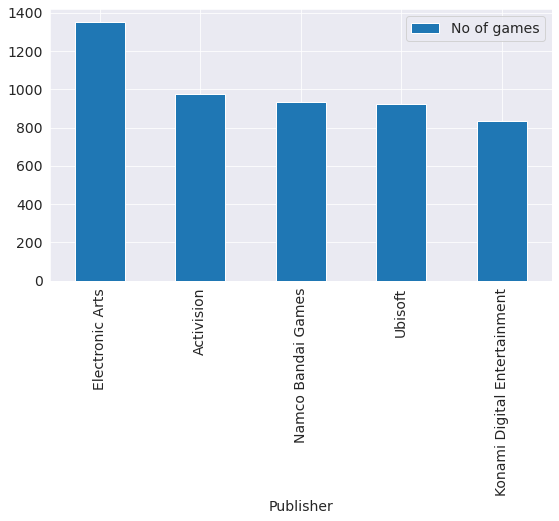

In [22]:
df_1.head(5).plot.bar(x = 'Publisher',y = 'No of games');

Distribution of genre depending on no of games shows that Action genre has highest share in overall distribution.

In [24]:
df_2 = df.groupby('Genre').size().reset_index(name = 'No of games')
df_2.set_index('Genre')

,No of games
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


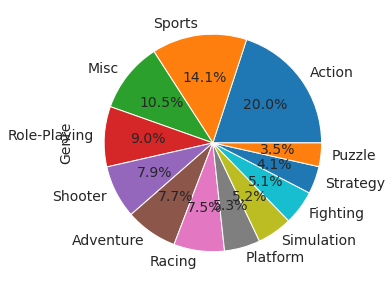

In [25]:
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%');

Top 5 platforms based on no of games published by each platform is shown below.

In [26]:
df_3 = df.groupby('Platform').size().sort_values(ascending = False).reset_index(name = 'No of games')
df_3 = df_3.head(5)

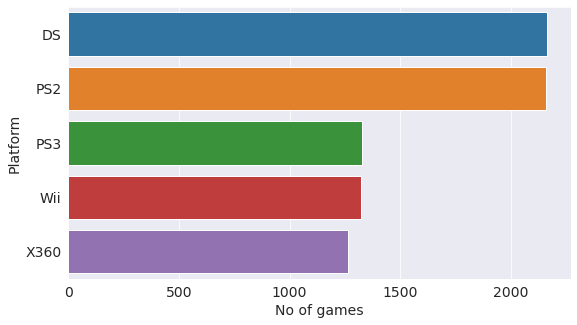

In [27]:
sns.barplot(data = df_3, x = 'No of games',y = 'Platform');

A scatterplot showing the amount of global sales by each genre shows action genre dominated most of the year sales after year 2000 with global sales of all genres picked up from 1995.

In [28]:
df_4 = df.groupby(['Year','Genre'])[['Global_Sales']].sum()
df_4

Global_Sales
Year   Genre                     
1980.0 Action                0.34
       Fighting              0.77
       Misc                  2.71
       Shooter               7.07
       Sports                0.49
...                           ...
2016.0 Sports               14.60
       Strategy              0.50
2017.0 Action                0.01
       Role-Playing          0.04
2020.0 Simulation            0.29

[389 rows x 1 columns]

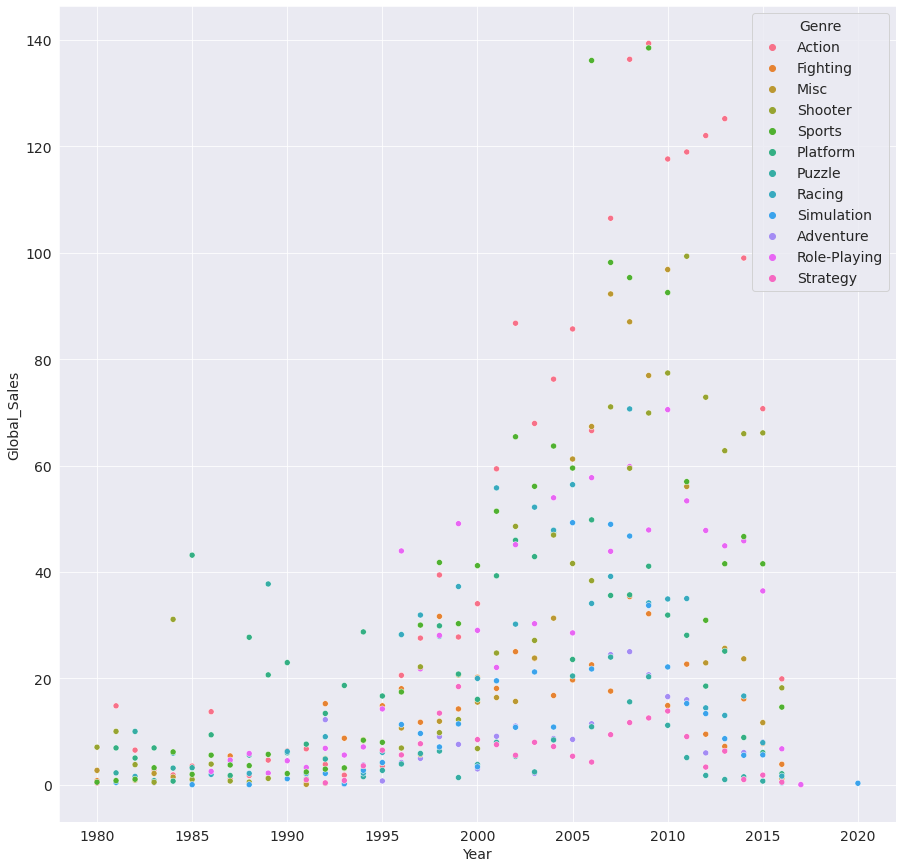

In [29]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = df_4, x = 'Year' , y = 'Global_Sales', hue = 'Genre');

A line plot of annual global sales shows that , the peak was seen in year 2008 (678.90 million).

In [30]:
df_5 = df.groupby('Year')[['Global_Sales']].sum().reset_index()
df_5

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


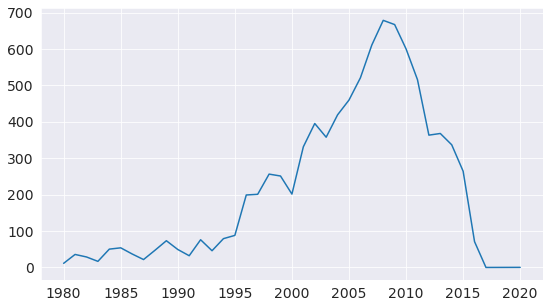

In [31]:
plt.plot(df_5.Year ,df_5.Global_Sales);

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'

## Asking and Answering Questions
In this section, from the data frame some questions are put to explore the data and to help in taking conclusive decisions.



#### Q1:What are the top 10 selling games in North America after 2015 and on which platform are these played on?
here, we have taken a sub dataframe from actual dataframe 
.sort_values(), helps to sort the values in a column 
.head(), gives out the top 10 dataframe.
sns.barplot(), gives the barplot of data.
.plot.pie(), gives a pie plot of the data.

In [34]:
df_6 = df[df['Year']>2015]
df_6 = df_6[['Name','NA_Sales','Platform']].sort_values('NA_Sales',ascending = False).head(10)
df_6

,Name,NA_Sales,Platform
271,Uncharted 4: A Thief's End,1.30,PS4
351,Tom Clancy's The Division,1.28,PS4
845,Tom Clancy's The Division,1.20,XOne
1628,Madden NFL 17,0.92,PS4
1701,NBA 2K17,0.83,PS4
2505,Madden NFL 17,0.72,XOne
2457,MLB 16: The Show,0.68,PS4
1026,Overwatch,0.64,PS4
770,Far Cry: Primal,0.59,PS4
1156,No Man's Sky,0.58,PS4


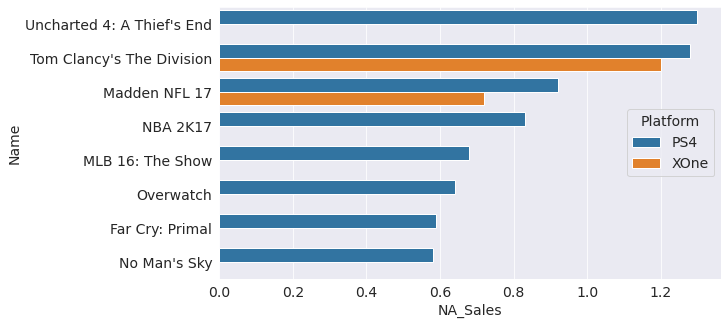

In [35]:
sns.barplot(data = df_6, x = 'NA_Sales', y = 'Name', hue = 'Platform');

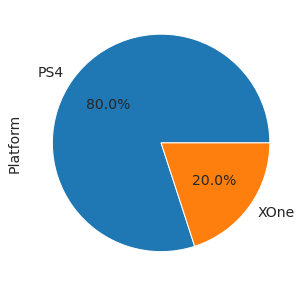

In [36]:
df_6['Platform'].value_counts().plot.pie(autopct='%1.1f%%');

#### Q2: What are the top 5 worst selling games globally after 2015, who is publisher of them and what genre do they belong to?
plt.figure enables us to give the required size to the figure

In [37]:
df_7 = df[df['Year']>2015]

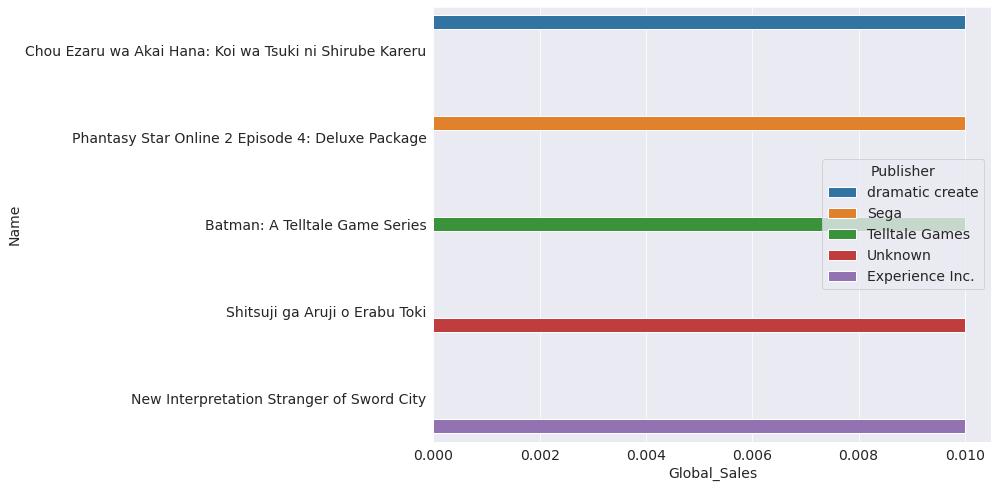

In [38]:
df_7 = df_7[['Name','Global_Sales','Platform','Publisher','Genre']].sort_values('Global_Sales',ascending = True).head(5)
plt.figure(figsize = (10,8))
sns.barplot(data = df_7,x = 'Global_Sales', y = 'Name', hue = 'Publisher');

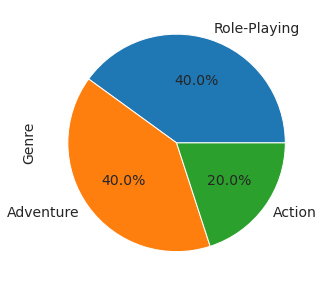

In [40]:
df_7['Genre'].value_counts().plot.pie(autopct='%1.1f%%');

#### Q3: What are the top 5 publishers,Genre and Platforms in Japan?
.set_index() makes the mentioned column as the index for the dataframe

In [45]:
q3_1 = df.groupby('Publisher')['JP_Sales'].sum().reset_index()
q3_1 = q3_1.sort_values('JP_Sales',ascending = False).head(5)
q3_1 = q3_1.set_index('Publisher')
q3_1



,JP_Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08


In [43]:
q3_2 = df.groupby('Genre')['JP_Sales'].sum().reset_index()
q3_2 = q3_2.sort_values('JP_Sales',ascending = False).head(5)
q3_2 = q3_2.set_index('Genre')
q3_2


,JP_Sales
Genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76


In [44]:
q3_3= df.groupby('Platform')['JP_Sales'].sum().reset_index()
q3_3 = q3_3.sort_values('JP_Sales',ascending = False).head(5)
q3_3 = q3_3.set_index('Platform')
q3_3



,JP_Sales
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
NES,98.65


#### Q4: What  is the distribution of different genre,platform sold by Sony Computer Entertainment in each country after 2010?

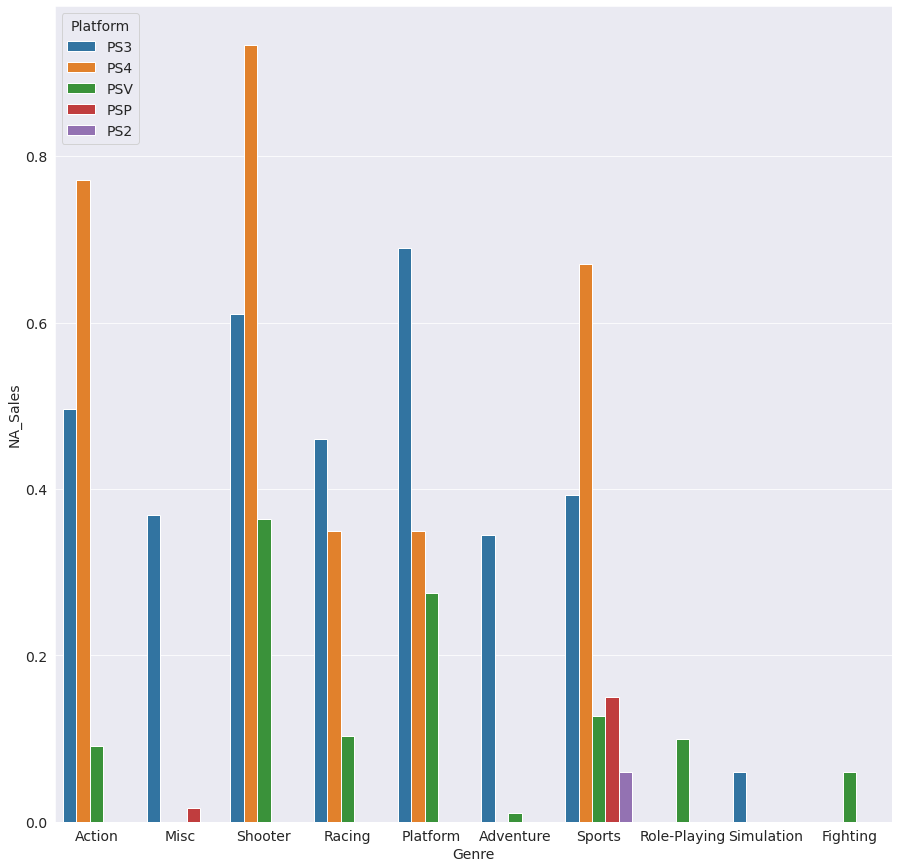

In [46]:
q4 = df[df['Publisher'] ==  'Sony Computer Entertainment']
q4= q4[q4['Year']>2010]
plt.figure(figsize = (15,15))
sns.barplot(data = q4, x = 'Genre', y = 'NA_Sales', hue = 'Platform',ci=None);

<AxesSubplot:xlabel='Genre', ylabel='EU_Sales'>

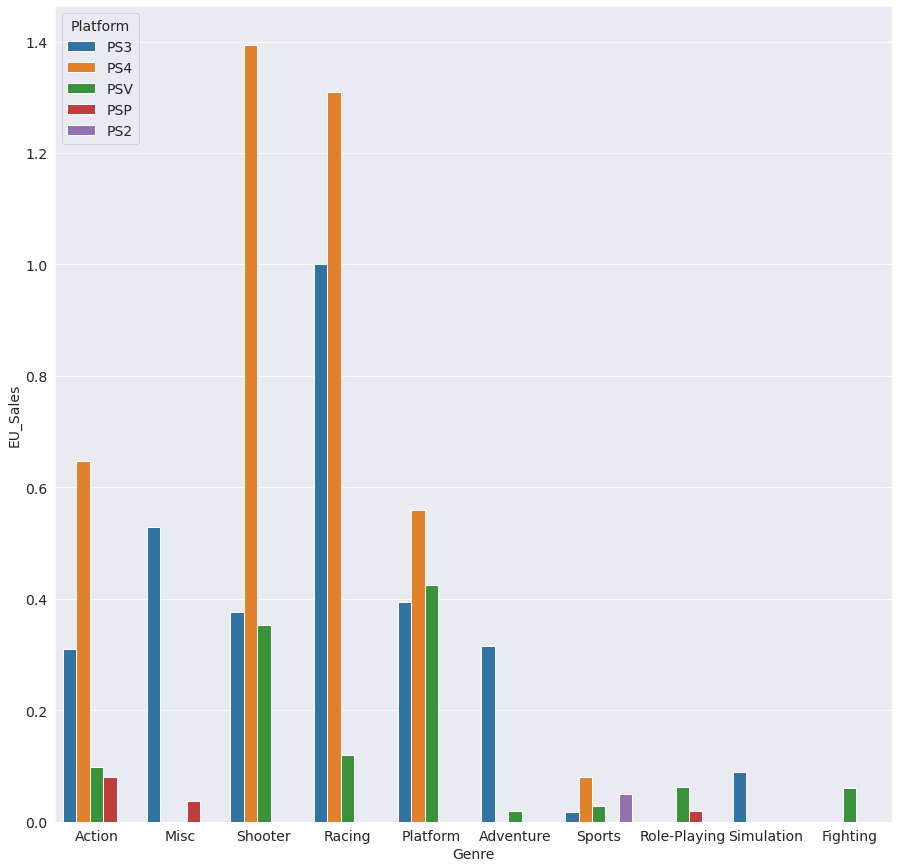

In [47]:
plt.figure(figsize = (15,15))
sns.barplot(data = q4, x = 'Genre', y = 'EU_Sales', hue = 'Platform',ci = None)

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

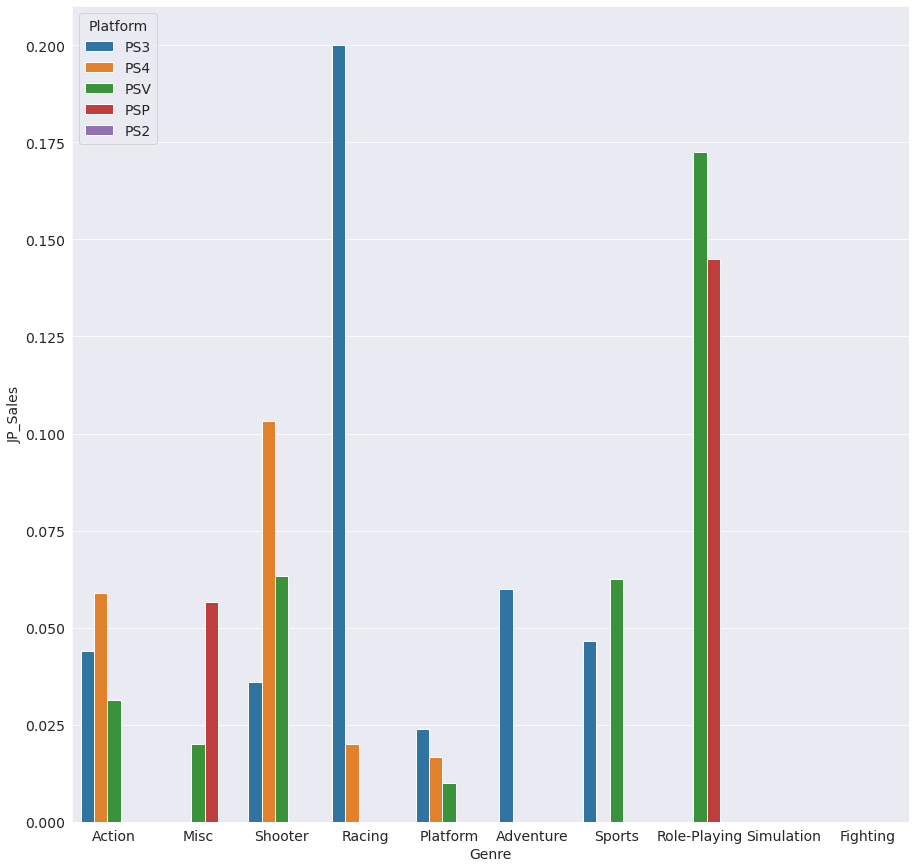

In [48]:
plt.figure(figsize = (15,15))
sns.barplot(data = q4, x = 'Genre', y = 'JP_Sales', hue = 'Platform',ci = None)

#### Q5: What is the distribution of top gaming platform in global Sales ?

In [49]:
q5 = df.groupby('Platform')[['Global_Sales']].sum().reset_index()
q5.sort_values('Global_Sales',ascending = False).head(1)

,Platform,Global_Sales
16,PS2,1255.64


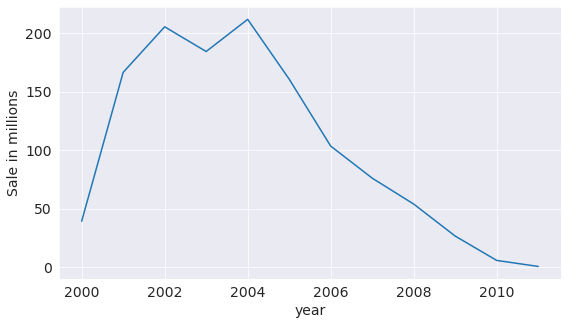

In [50]:
q5_1 = df[df['Platform'] ==  'PS2']
q5_2 = q5_1.groupby('Year')[['Global_Sales']].sum().reset_index()
plt.plot(q5_2.Year,q5_2.Global_Sales)
plt.xlabel('year')
plt.ylabel('Sale in millions');


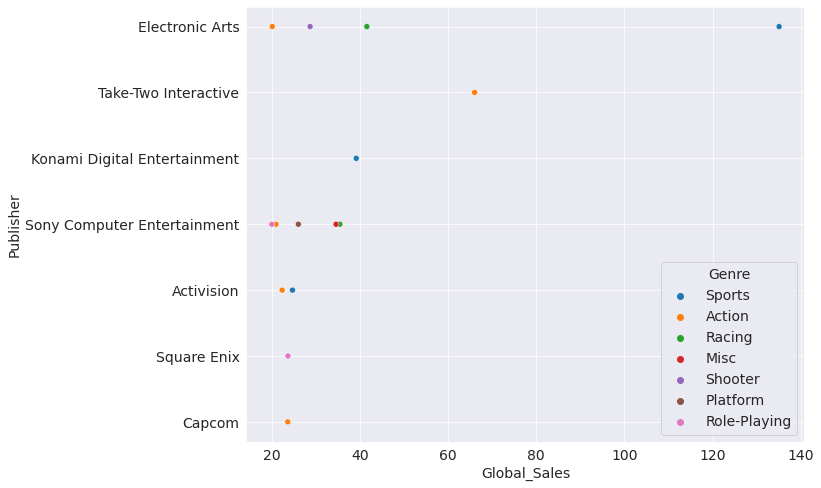

In [51]:
q5_3 = q5_1.groupby(['Publisher','Genre'])[['Global_Sales']].sum()
q5_3 = q5_3.sort_values('Global_Sales',ascending = False).head(15)
plt.figure(figsize = (10,8))
sns.scatterplot(data = q5_3, x = 'Global_Sales',y = 'Publisher',hue='Genre');

Let us save and upload our work to Jovian before continuing.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'

## Inferences and Conclusion

From exploratory data analysis of worldwide video game data, Electronic arts is the biggest publisher with highest volume of games released,action genre has almost 20% share of games with DS as the highest used gaming platform.The sales peaked at 2008.
Uncharted-4 on PS-4 platform is highest sold game after 2015,New interpretation Stranger of Sword city is worst selling game in global market.PS-2 is the most used platform in contribution to global sales with electron arts sport genre games.

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'

## References and Future Work
The reference for this data is https://www.kaggle.com/datasets/gregorut/videogamesales.
In-depth analysis can be done for each country, publisher and platform.


In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "me20m013/worldwide-videogamesale-eda" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/me20m013/worldwide-videogamesale-eda


'https://jovian.ai/me20m013/worldwide-videogamesale-eda'